<a href="https://colab.research.google.com/github/DAKSHAY111/CE134_ML_LABS/blob/main/LAB9/ML_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-02c4c3b3384e>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  centroid = np.array([centroid])
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy 0.0
Precision 0.0
Recall 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

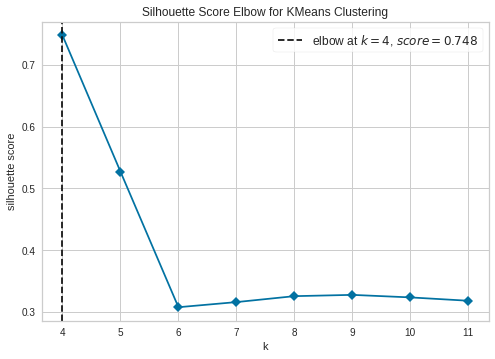

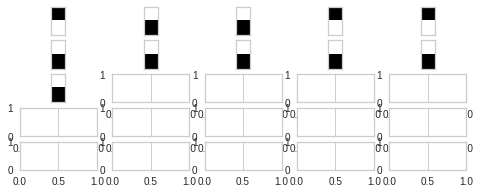

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

X, Y = make_blobs(n_samples=10000, centers=3, cluster_std=0.2)

trainX, testX, trainL, testL = train_test_split(X, Y, random_state=22, test_size=0.1)

sumX = 0 
cnt = 0
sumY = 0
for x in trainX:
  cnt += 1
  sumX += x

for y in trainL:
  sumY += y

centroid = []

centroid.append(sumX / cnt)
centroid.append(sumY / cnt)

centroid = np.array([centroid])

kmeans = KMeans(n_clusters=3).fit(trainX, trainL)

predicted = kmeans.predict(testX)
print('Accuracy {}'.format(accuracy_score(testL, predicted)))
print('Precision {}'.format(precision_score(testL, predicted, average='weighted')))
print('Recall {}'.format(recall_score(testL, predicted, average='weighted')))
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

# plt.scatter(X[:,0], X[:,1])

visualizer = KElbowVisualizer(
    kmeans, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(trainX)
visualizer.show()

fig, ax = plt.subplots(5, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(11,2,1)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

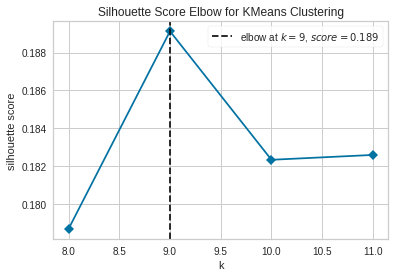

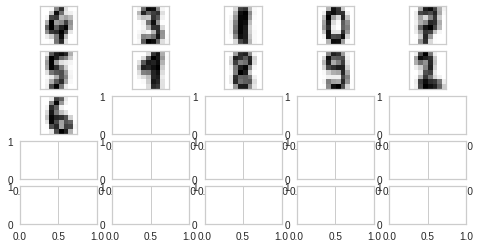

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

digits = load_digits()
digits.keys()

X = digits['data'][0:1797,0:64]

# plt.scatter(X[:,0], X[:,1])

kmeans = KMeans(n_clusters=3).fit(X)

visualizer = KElbowVisualizer(
    kmeans, k=(8,12), metric='silhouette', timings=False
)

visualizer.fit(X)
visualizer.show()

fig, ax = plt.subplots(5, 5, figsize = (8,4))
centers = kmeans.cluster_centers_.reshape(11,8,8)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)